# Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Tareas a realizar:

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo csv.
2. Crear un programa que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en el DataFrame, y un **mes** del año.
3. Mostrarle al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
4. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:/Users/tomor/OneDrive/Documentos/Programacion/Python para Data Science & Machine Learning/Proyectos/Matplotlib/Datos+Meteorológicos_Arg_2023.csv")
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [5]:
df.shape

(1825, 7)

In [6]:
df.dtypes

Fecha                    object
Ciudad                   object
Temperatura Maxima        int64
Temperatura Minima        int64
Precipitacion           float64
Velocidad del Viento    float64
Humedad Relativa        float64
dtype: object

In [8]:
df.describe()

,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,17.827945,10.191233,11.469205,24.963945,59.251890
std,8.139477,6.540120,27.714274,8.640341,17.282792
min,2.000000,-3.000000,0.000000,10.000000,30.000000
25%,12.000000,6.000000,0.000000,17.900000,44.400000
50%,17.000000,10.000000,0.000000,24.900000,58.200000
75%,23.000000,15.000000,0.000000,32.300000,74.800000
max,36.000000,22.000000,119.500000,40.000000,90.000000


In [10]:
df.isnull().sum()

Fecha                   0
Ciudad                  0
Temperatura Maxima      0
Temperatura Minima      0
Precipitacion           0
Velocidad del Viento    0
Humedad Relativa        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [18]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [22]:
#  Pedir al usuario que seleccione una ciudad de la lista de ciudades disponibles en nuestro DataFrame, y un mes del año.
df['Ciudad'].unique()

array(['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman'],
      dtype=object)

In [23]:
# Obtener las ciudades disponibles del df
lista_ciudades = []

for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [24]:
# Diccionario con los meses
dict_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9:'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

In [30]:
# Función para que el usuario seleccione una ciudad y mes para consultar la temperatura
def consulta_temperaturas():
    while True:
        # Solicitar la ciudad
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_seleccionada = input("Seleccione la ciudad de la lista: ").title()
        
        # Solicitar el mes
        mes_seleccionado = int(input("Seleccione un número de mes: "))

        # Validar los inputs
        if ciudad_seleccionada not in lista_ciudades or mes_seleccionado not in range(1, 13):
            print("Ciudad o mes no válidos. Intente nuevamente.")
            continue
            
        # Crear df filtrado
        df_ciudad_mes = df[(df['Ciudad'] == ciudad_seleccionada) & (df['Fecha'].dt.month == mes_seleccionado)]

        # Graficar las temperaturas
        plt.figure(figsize=(10, 6))
        plt.plot(df_ciudad_mes['Fecha'], df_ciudad_mes['Temperatura Maxima'], label="Máxima", color="red")
        plt.plot(df_ciudad_mes['Fecha'], df_ciudad_mes['Temperatura Minima'], label="Míxima", color="blue")
        plt.title(f"Temperaturas en {ciudad_seleccionada} durante el mes de {dict_meses[mes_seleccionado]}")
        plt.xlabel("Mes")
        plt.ylabel("Temperatura")
        plt.xticks(rotation=45)
        plt.show()

        # Preguntar al usuario si desea continuar
        nueva_consulta = input("Desea consultar otra temperatura? (s/n): ")
        if nueva_consulta.lower() != 's':
            break;


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Seleccione la ciudad de la lista:  Buenos Aires
Seleccione un número de mes:  1


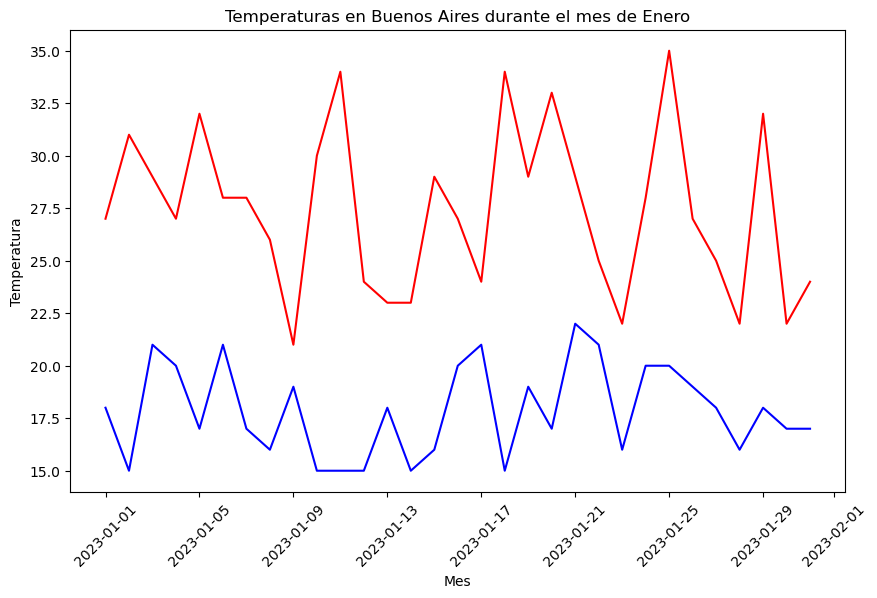

Desea consultar otra temperatura? (s/n):  s



Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Seleccione la ciudad de la lista:  Cordoba
Seleccione un número de mes:  5


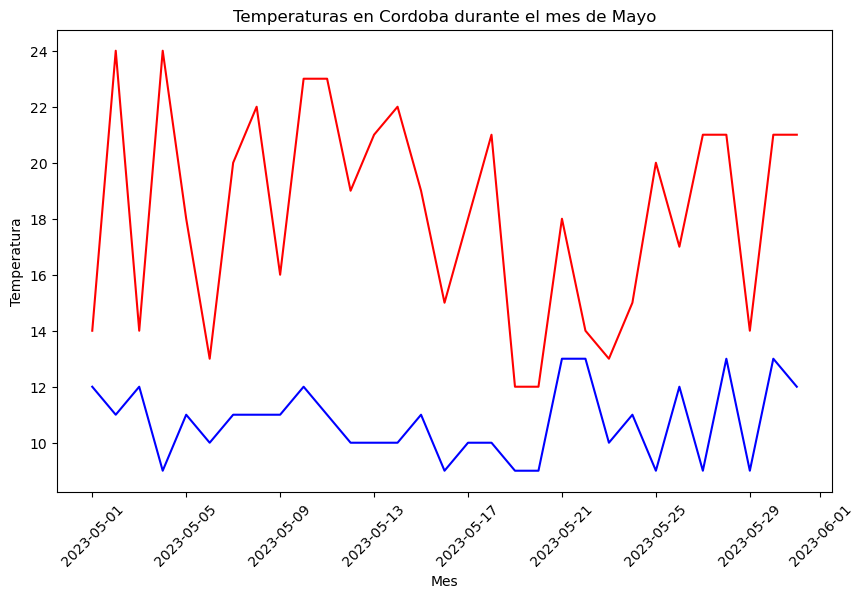

Desea consultar otra temperatura? (s/n):  n


In [31]:
consulta_temperaturas()